<a href="https://colab.research.google.com/github/acmucsd-projects/AI-Tutorial-Resources/blob/main/Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trees

Contributors: Katie


Welcome to the Trees notebook! We will cover the following topics:
- Decision Trees 🌲
  - What is a Decision Tree?
  - Classification vs. Regression
  - Hyperparameters
- Random Forests 🌲🌲🌲
  - XGBoost Random Forest models
- Confusion Matrices
  - Metrics

## What is a Decision Tree?

A decision tree is a **model that splits data into smaller groups** by asking a series of yes/no questions. The model chooses these questions based on the **features** (i.e., columns) of the data.

> The goal of a decision tree is to **make accurate decisions or predictions about new data**, based on its knowledge from current data!

A decision tree is a **non-parametric supervised learning** method.
- **non-parametric**: The parameters of the model are not fixed.
  - It learns these parameters (e.g., which feature to split, threshold value of split, etc.) through training.
  - Linear regression, a parametric method, will always only have 2 parameters: slope and intercept.
- **supervised learning**: The training data must have data about the feature we want to predict.
  - To predict if someone has diabetes based on their glucose levels and BMI, we need data on other patients' glucose levels, BMI, and *whether they actually have diabetes or not*.
  - The model is only as good as the data we give it!

As the name suggests, this tree-like structure looks like this:

<img src='https://waz.smartdraw.com/decision-tree/img/structure-of-a-decision-tree.png?bn=15100111939' width=500>

- Root Node: The starting point of the tree! Asks the first question to split the data.
- Decision Node: Branched from the root node or another decision node. Asks another question to split the data.
- Leaf Node: An end point of the tree. Makes a final decision or prediction!

## Classification vs. Regression

A decision tree can be used to predict both categorical and numerical values!

> Scikit-learn (`sklearn`), a popular machine learning library for Python, has both classification and regression models for decision trees.

Classification: predicts category
- Predict diabetes (yes, no)
- Predict letter grade (A, B, C, D, F)
- in `sklearn`: `DecisionTreeClassifier()`
([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))

Regression: predicts number(s)
- Predict age
- Predict tomorrow's temperature and humidity
- in `sklearn`: `DecisionTreeRegressor()` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html))

### Classification

We'll start with a classification example.

Let's say you want to decide what top to wear today based on the weather. You have some data from 20 other days that include the temperature, chance of rain, and what you wore that day.

In [129]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [130]:
# Create data (feel free to change any of the values)
weather = pd.DataFrame(columns=['Temperature (ºF)', 'Chance of Rain (%)', 'Top'],
                       data=[[80, 0, 't-shirt'],
                             [70, 10, 'long sleeve'],
                             [80, 10, 't-shirt'],
                             [50, 100, 'raincoat'],
                             [60, 70, 'raincoat'],
                             [90, 0, 't-shirt'],
                             [70, 20, 'jacket'],
                             [80, 0, 't-shirt'],
                             [60, 20, 'long sleeve'],
                             [90, 10, 't-shirt'],
                             [70, 0, 'jacket'],
                             [70, 10, 'long sleeve'],
                             [80, 0, 't-shirt'],
                             [50, 0, 'jacket'],
                             [90, 20, 't-shirt'],
                             [70, 80, 'raincoat'],
                             [80, 0, 't-shirt'],
                             [60, 10, 'long sleeve'],
                             [70, 0, 'long sleeve'],
                             [60, 30, 'jacket']])
weather.head()

,Temperature (ºF),Chance of Rain (%),Top
0,80,0,t-shirt
1,70,10,long sleeve
2,80,10,t-shirt
3,50,100,raincoat
4,60,70,raincoat


Before we create our model, it is good practice to first split the data into two parts: **training** and **testing**.

> The model will only learn from the training data, and we will evaluate its performance on the testing data it has not seen before. Since we have the actual top worn in the test set as well, we can determine how accurate the model truly is!

To visualize this, let's use `train_test_split` from `sklearn`'s `model_selection` module. ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))
- Takes in `n` DataFrames and splits them into `n` training and `n` testing sets.
- For our purposes, we'll split `weather` into 2 DataFrames where
  - the first one contains all the features the model will learn from (temperature, chance of rain) and
  - the second one contains the feature the model will predict (top).
- We'll call these X and y.

In [131]:
from sklearn.model_selection import train_test_split
from IPython.display import display # just for visual purposes

In [132]:
X = weather[['Temperature (ºF)', 'Chance of Rain (%)']]
y = weather[['Top']]

# Randomly splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [133]:
# Notice that the row indices in each set are the same
display(X_train, y_train)

,Temperature (ºF),Chance of Rain (%)
14,90,20
4,60,70
17,60,10
7,80,0
1,70,10
13,50,0
0,80,0
19,60,30
18,70,0
9,90,10


,Top
14,t-shirt
4,raincoat
17,long sleeve
7,t-shirt
1,long sleeve
13,jacket
0,t-shirt
19,jacket
18,long sleeve
9,t-shirt


In [134]:
# Notice that the row indices in each set are the same
display(X_test, y_test)

,Temperature (ºF),Chance of Rain (%)
3,50,100
16,80,0
6,70,20
10,70,0
2,80,10


,Top
3,raincoat
16,t-shirt
6,jacket
10,jacket
2,t-shirt


Now we're ready to create and train our model!

In [135]:
# Creates model with default hyperparameters
dt_class = DecisionTreeClassifier()

 # Trains model on only the training data
dt_class.fit(X_train, y_train)

DecisionTreeClassifier()

This doesn't show us much... We can visualize our tree using `sklearn`'s `plot_tree`. ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html))

In [136]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt # just for visual purposes

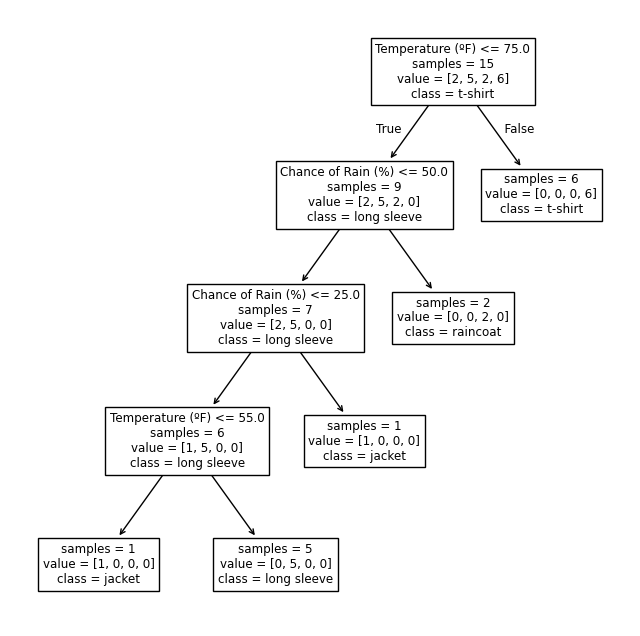

In [137]:
plt.figure(figsize=(8, 8))
plot_tree(dt_class,
          feature_names=X_train.columns, # must be in same order as data
          class_names=['jacket', 'long sleeve', 'raincoat', 't-shirt'], # must be in alphabetical order
          impurity=False
          )
plt.show()

The first line of each decision node is the question that determines how to split the data. The root node splits the data by `Temperature (ºF) <= 75.0`. Left arrows always mean `True` and right arrows always mean `False`.

`samples` is number of rows in that reached that node. In the rightmost node, 6 rows *do not* have a temperature <= 75, and are classified as t-shirts.

`value` shows the distribution of counts at that node. The root node is [2, 5, 2, 6], which equates to 2 jackets, 5 long sleeves, 2 raincoats, and 6 tshirts.

`class` is the majority class at that node.

### Regression (and Encoding)

Let's try making a decision tree using the same `weather` DataFrame. This time, we will use the `DecisionTreeRegressor()` to predict `Temperature (ºF)`.



In [138]:
X = weather[['Chance of Rain (%)', 'Top']]
y = weather[['Temperature (ºF)']]

One issue is that the `Top` column is categorical. A decision tree cannot use categorical data because it uses mathematical comparisons (<, >, =) to make these splits. (What is `Top <= 'jacket'`?)

Decision Trees, and most machine learning models, can only use **numerical features** to help them make predictions. To combat this, we can use an **encoding technique**, or a method to convert categorical variables into numerical ones!

- `X`: only numerical variables
- `y`: either numerical or categorical variables

One such technique is **One Hot Encoding**, from `sklearn`'s `preprocessing` module. ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html))

In [139]:
from sklearn.preprocessing import OneHotEncoder

For a categorical column `C`, one-hot encoding creates a separate column for each unique value in `C`. Each row gets a 1 in the column that matches its value, and 0 in all the others. Check out the example below.

In [140]:
# Create example categorical column
top_only = pd.DataFrame(columns=['Top'],
                        data=[['t-shirt'], ['jacket'], ['long sleeve'], ['raincoat']])
top_only

,Top
0,t-shirt
1,jacket
2,long sleeve
3,raincoat


In [141]:
# Create One Hot Encoder
one_hot = OneHotEncoder(sparse_output=False)

# fit: stores mapping of the data ('jacket' = [1 0 0 0], 't-shirt' = [0 0 0 1], etc.)
# transform: applies mapping the data (converts mapping to 2D array)
top_encoded = one_hot.fit_transform(top_only[['Top']]) # DataFrame with only categorical column(s)

# Turn 2D array into DataFrame
pd.DataFrame(data=top_encoded,
             columns=one_hot.get_feature_names_out(['Top'])) # Column name(s), in a list

,Top_jacket,Top_long sleeve,Top_raincoat,Top_t-shirt
0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0


Now it's your turn! One Hot Encode the `Top` column in the `weather` DataFrame. Make sure you add the other columns back too.

In [142]:
# For your convenience, the weather DataFrame again
weather.head()

,Temperature (ºF),Chance of Rain (%),Top
0,80,0,t-shirt
1,70,10,long sleeve
2,80,10,t-shirt
3,50,100,raincoat
4,60,70,raincoat


In [143]:
# One Hot Encode the `Top` column

# TODO: Create One Hot Encoder and set sparse_output=False
one_hot = ...

# TODO: Use the encoder to fit and transform the `Top` column of the `weather` DataFrame
weather_encoded = ...

# TODO: Turn 2D array into DataFrame
encoded_df = ...

# TODO: Concat encoded_df with `Temperature (ºF)` and `Chance of Rain (%)` columns from `weather`
encoded_df = ...
encoded_df

Ellipsis

Use the `DecisionTreeRegressor()` and our newly encoded `encoded_df` DataFrame to predict `Temperature (ºF)`.

In [144]:
from sklearn.tree import DecisionTreeRegressor

In [145]:
### TODO: Define X and y and complete a train test split

X = ... # which columns?
y = ... # which columns?

X_train, X_test, y_train, y_test = ..., ..., ..., ...

In [146]:
### TODO: Create and train a decision tree regression model

dt_reg = ...
...

Ellipsis

In [147]:
# Visualize tree! Uncomment when you're done

# plt.figure(figsize=(10, 8))
# plot_tree(dt_reg,
#           feature_names=X_train.columns, # must be in same order as data
#           )
# plt.show()

### Answer

In [148]:
# One Hot Encode the `Top` column

# TODO: Create One Hot Encoder and set sparse_output=False
one_hot = OneHotEncoder(sparse_output=False)

# TODO: Use the encoder to fit and transform the `weather` DataFrame
weather_encoded = one_hot.fit_transform(weather[['Top']])

# TODO: Turn 2D array into DataFrame
encoded_df = pd.DataFrame(data=weather_encoded,
                          columns=one_hot.get_feature_names_out(['Top']))

# TODO: Concat encoded_df with `Chance of Rain (%)` and `Temperature (ºF)` columns from `weather`
encoded_df = pd.concat([encoded_df, weather[['Chance of Rain (%)', 'Temperature (ºF)']]], axis=1)

### TODO: Define X and y and complete a train test split
X = encoded_df.drop(columns=['Temperature (ºF)']) # which columns?
y = encoded_df['Temperature (ºF)'] # which columns?
X_train, X_test, y_train, y_test = train_test_split(X, y)

### TODO: Create and train decision tree regression model
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

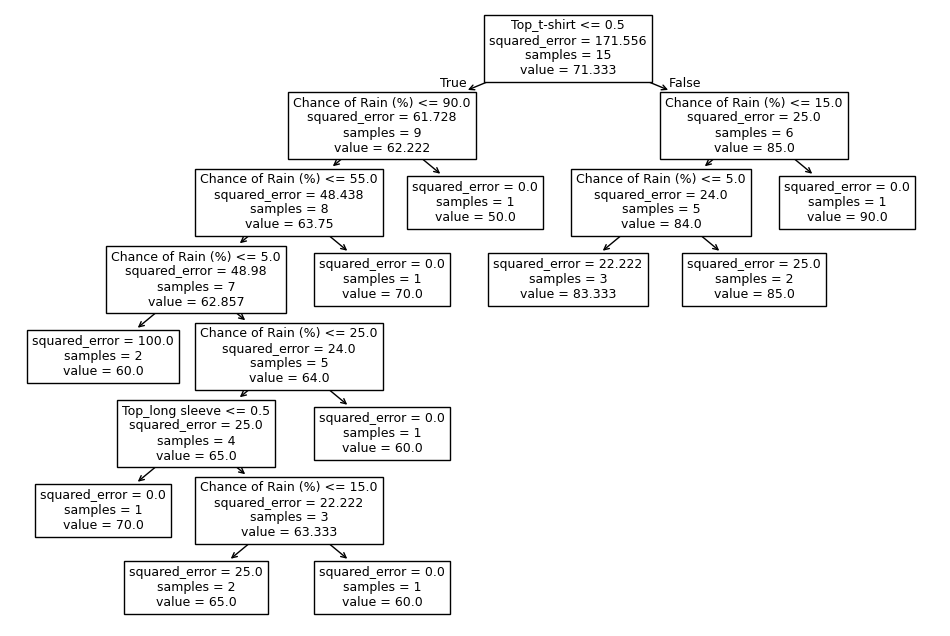

In [149]:
# Visualize tree! Uncomment when you're done

plt.figure(figsize=(12, 8))
plot_tree(dt_reg,
          feature_names=X_train.columns, # must be in same order as data
          )
plt.show()

If you know the game, *20 Questions*, you might have noticed that decision trees follow a similar logic. They ask the "best" questions to help narrow down the possible answers until only one is left!

> But how does a decision tree know which feature and split is the "best?"

## Hyperparameters

The `DecisionTreeClassifier()` and `DecisionTreeRegressor()` have many **hyperparameters**, such as `criterion`, `min_samples_split`, `max_depth`, etc. These are different than *parameters* because we get to choose them, rather than the model.

### Criterion

The `criterion` hyperparameter **controls how the tree decides to split the data**. They utilize mathematical formulas to decide which split is the best!

Classifiers and Regressors have different criterion. Some examples include:
- For classification:
  - [Gini impurity](https://www.learndatasci.com/glossary/gini-impurity/): `criterion = 'gini'` (default)
  - [Entropy](https://www.geeksforgeeks.org/how-to-calculate-entropy-in-decision-tree/): `criterion = 'entropy'`

- For regression:
  - [Mean squared error](https://www.geeksforgeeks.org/retrieving-node-mse-in-decisiontreeregressor/): `criterion = 'squared_error'` (default)
  - [Mean absolute error](https://www.geeksforgeeks.org/how-to-calculate-mean-absolute-error-in-python/): `criterion = 'absolute_error'`

We won't go in detail about them in this notebook, but feel free to read more about them by clicking on each link.

Since our regression model from earlier was created using the default hyperparameters, it's **criterion** is **mean squared error**. Let's check out the predictions! (Make sure to run the cells in the Answer section if you didn't fill out the code!)

In [153]:
from sklearn.metrics import mean_squared_error

In [154]:
# The .predict() method generates predictions based on the trained model
y_train_pred = dt_reg.predict(X_train)
y_test_pred = dt_reg.predict(X_test)

# Test the MSE of the training set
train_mse = mean_squared_error(y_train, y_train_pred)

# Test the MSE of the testing set
test_mse = mean_squared_error(y_test, y_test_pred)

print('Training Set MSE: ', train_mse)
print('Testing Set MSE: ', test_mse)

Training Set MSE:  24.444444444444446
Testing Set MSE:  49.444444444444436


What do these mean? MSE is the **average squared difference** between the actual and predicted temperatures. So the training MSE of ~24 doesn't mean that the model was 24º off, but rather $\sqrt{24}$ ~5º! Similarly, the testing MSE is $\sqrt{49}$ ~7º.

Let's visualize the predictions vs. actual temperatures.

In [167]:
predictions = pd.DataFrame({'actual temp': y_train})
predictions['predicted temp'] = y_train_pred
predictions

,actual temp,predicted temp
13,50,60.000000
12,80,83.333333
15,70,70.000000
3,50,50.000000
8,60,60.000000
5,90,83.333333
2,80,85.000000
19,60,60.000000
7,80,83.333333
17,60,65.000000


Pretty good! But remember we trained the model with this data. We will see the model's true performance by looking at the test set's predictions.

In [168]:
predictions = pd.DataFrame({'actual temp': y_test})
predictions['predicted temp'] = y_test_pred
predictions

,actual temp,predicted temp
4,60,70.000000
0,80,83.333333
1,70,65.000000
18,70,60.000000
16,80,83.333333


Still pretty good, but we can see larger differences (60 vs. 70).

### Min Samples Split and Max Depth

Ultimately, we want to use hyperparameters to make sure the training and testing MSE (or other criterion) are both low in value and similar to one another. Decision trees tend to **overfit** the training data, which means that the model might work really well for the data it was trained on, but not as effectively for unseen data. This is because decision trees, by default, keep splitting the data until every specific detail of the training data is found, rather than finding general patterns.

The `min_samples_split` and `max_depth` hyperparameters can help reduce overfitting by limiting when the tree can split.
- `min_samples_split` (int): sets the minimum number of samples required to split a node (default=`2`)
- `max_depth` (int): sets the maximum number of levels a tree can split from root to leaf (default=`None`)

Let's try visualizing a new `DecisionTreeRegressor()` to have a `min_samples_split` of 5 and `max_depth` of 3.

In [172]:
dt_new = DecisionTreeRegressor(min_samples_split=5, max_depth=3)
dt_new.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_split=5)

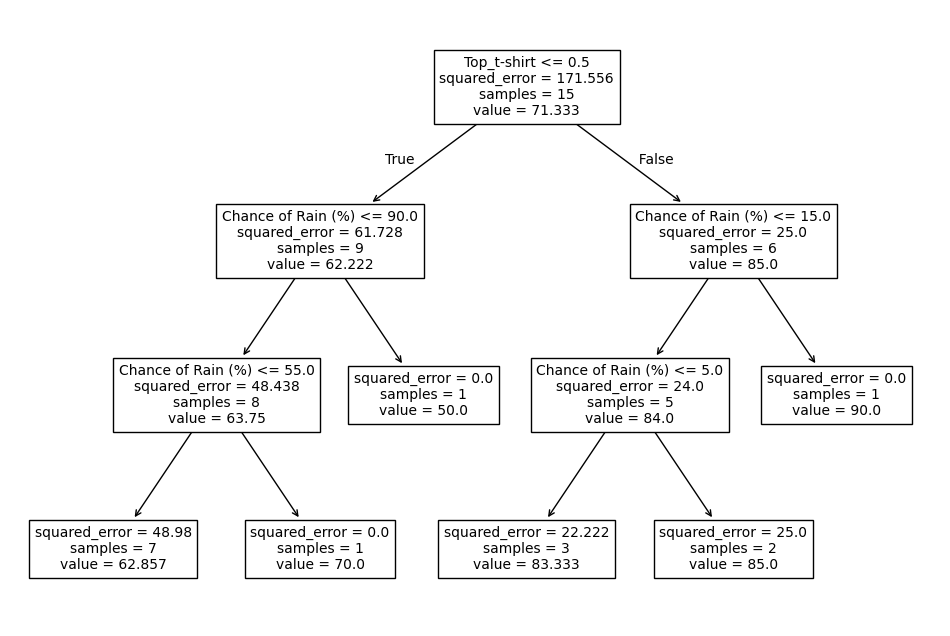

In [173]:
plt.figure(figsize=(12, 8))
plot_tree(dt_new,
          feature_names=X_train.columns, # must be in same order as data
          )
plt.show()

As you can see, no split has a sample less than 5 and the entire tree has a maximum depth of 3.

Let's see if this changed our MSEs.

In [174]:
# The .predict() method generates predictions based on the trained model
new_train_pred = dt_new.predict(X_train)
new_test_pred = dt_new.predict(X_test)

# Test the MSE of the training set
train_mse_new = mean_squared_error(y_train, new_train_pred)

# Test the MSE of the testing set
test_mse_new = mean_squared_error(y_test, new_test_pred)

print('Training Set MSE: ', train_mse_new)
print('Testing Set MSE: ', test_mse_new)

Training Set MSE:  30.63492063492064
Testing Set MSE:  44.85260770975058


Though the MSE is worse for the training set, it is also better for the testing set. In addition, the values are closer to one another, making the model more generalizable!

Your turn! Create a new `DecisionTreeRegressor()` with `criterion='absolute_error'`, `min_samples_split=4`, and `max_depth=4`. Print out the MSEs for the training and testing sets.

In [ ]:
# TODO: Create new regressor and fit to training data
dt_abs = ...
...

# TODO: Use .predict() to generate predictions
abs_train_pred = ...
abs_test_pred = ...

# TODO: Find the MSE of the training set
train_mae = ...

# TODO: Find the MSE of the testing set
test_mae = ...

print('Training Set MAE: ', train_mae)
print('Testing Set MAE: ', test_mae)

Better or worse than MSE? Depending on the dataset, some criterion are better than others...

### Answer

In [175]:
# TODO: Create new regressor and fit to training data
dt_abs = DecisionTreeRegressor(criterion='absolute_error', min_samples_split=4, max_depth=4)
dt_abs.fit(X_train, y_train)

# TODO: Use .predict() to generate predictions
abs_train_pred = dt_abs.predict(X_train)
abs_test_pred = dt_abs.predict(X_test)

# TODO: Find the MSE of the training set
train_mse_abs = mean_squared_error(y_train, abs_train_pred)

# TODO: Find the MSE of the testing set
test_mse_abs = mean_squared_error(y_test, abs_test_pred)

print('Training Set MAE: ', train_mse_abs)
print('Testing Set MAE: ', test_mse_abs)

Training Set MSE:  40.0
Testing Set MSE:  60.0
